# Neville Modise 

## Neural Network Implementation - ACML Assignment 2






This radar dataset was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

We will need to classify the data into good(‘g’) and bad(‘b’). Good (‘g’) radar shows some evidence of returns in the Ionosphere whereas Bad (‘b’) radar are those signals that do not pass through the ionosphere.





In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Loading the data

In [2]:
dataset = pd.read_csv('ionosphere.csv',header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


# Data Analysis

Text(0.5, 1.0, 'Class Distribution')

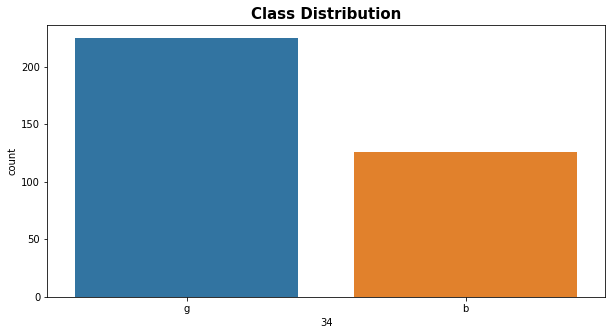

In [3]:
plt.figure(figsize=(10, 5))
sns.countplot(x=34, data=dataset)
plt.title('Class Distribution',fontsize=15, fontweight='bold')

As we can see the dataset has a class imbalance, but it's not that severe.

# Data Preprocessing

In [4]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset is already normalized so there's no need to implement improved learning techniques.
We can also see that the mean values for each variable are in the tens, with values ranging from -1 to 1. This confirms that scaling the data is probably not required

##  Removing unnecessary features

The second column, has no variance and therefore isn't useful to the model and so we remove it.

In [5]:
#drop the second column
dataset.drop(columns=[1], inplace=True)

##  One-Hot Encoding

We can also see that the label is a string (“g” and “b“), suggesting that the values will need to be encoded to 0 and 1 prior to fitting a model.

In [6]:
#encoding
dictionary = {"g":1, "b":0}
dataset.iloc[:,33] = dataset.iloc[:,33].map(dictionary)

# Creating the model

## Sigmoid & ReLU Activation Functions

We will be implementing the Sigmoid Activation Function and the Rectified Linear Unit (ReLU) Activation Function.
The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice. The ReLU is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero. So this function is effectively a linear function that zeroes out negative values.

In [7]:
# ReLU Activation Function 
def ReLU(x):
    return np.maximum(0,x)

# Sigmoid Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

###  Derivative of the Sigmoid & ReLU Activation Functions

We use differentiation so that when updating the curve, we can know in which direction and how much to change or update the curve depending upon the slope.

In [8]:
def derivative_ReLU(x):
    return x>0

def derivative_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

##  The Loss Function

We use the Logarithmic loss Function as this is a Binary Classification Problem

In [9]:
#logarithmic loss function
def logarithim_loss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

###  Derivative of the loss function

In [10]:
#log loss derivative
def d_logarithim_loss(y, a):
    return (a-y)/(a*(1-a))

##  Creating the layer class

In [11]:
class no_of_layer:
    
    # Dictionary 
    Functions = {
        'sigmoid' : (sigmoid, derivative_sigmoid),
        'relu' : (ReLU, derivative_ReLU)
    }
    
    alpha = 0.2
    
    def __init__(self, initial, percept, activation):
        # Initialization of the biases
        self.b = np.zeros((percept,1))
         # Initialization of the weights
        self.W = np.random.randn(percept, initial)
        
        self.act, self.d_act = self.Functions.get(activation)
        
    #feed foward function   
    def forward_prop(self, A_prev):
        # We store the original value
        self.A_prev = A_prev
        
        # Calculates the Weights 
        self.Z = np.dot(self.W, self.A_prev) + self.b 
        
        # Used to find the output this layer
        self.A = self.act(self.Z)
        return self.A
    
    #backward_propagation function    
    def backward_prop(self, dA):
        
        # we calculate the derivatives with respect to the cost function
        dZ = np.multiply(self.d_act(self.Z), dA)
        
         # Derivative of the bias
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims = True)
        
        # Weight derivative, divided by the number of samples to get the average across all samples 
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        
        # derivative to pass through the previous laer
        derivative_A_prev = np.dot(self.W.T, dZ)
        
        # Gradient Descent to update the weights and biases
        self.W = self.W - self.alpha * dW
        self.b = self.b - self.alpha * db
        return derivative_A_prev

## Building the network

In [12]:
def n_network(m, epochs , layers, X, y):
    costF = []
    accrt = [] 
    
    for epoch in range(epochs):
    
        # Input
        A = X
# the output of of the previous layer will be the input of the next layer
        for layer in layers:
            
            A = layer.forward_prop(A)


        cost = 1/m * np.sum(logarithim_loss(y, A))
        costF.append(cost)        
        # Calculation of the accuracy
        predic = A.T
        predic = predic.reshape(predic.shape[0],)
        predic = (predic > 0.5).astype(int)
        accuracy = np.mean(predic==y)    
        accrt.append(accuracy)

        # Derivative of the output
        dA = d_logarithim_loss(y, A)

        # backward_propagate 
        for layer in reversed(layers):
            dA = layer.backward_prop(dA)

    return costF,accrt

## Training the model

In [13]:
#model training
X = np.array(dataset.drop(33,axis=1))
y = np.array(dataset[33]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)
X_train, X_test = X_train.T, X_test.T
epochs = 800
#this function calculates the accuracy of a given network 
def accuracy(layers, X_test, y_test):

    costF,accrt  = n_network(len(X_train), epochs, layers , X_train, y_train )
    # calcualte the cost
    A = X_test
    for layer in layers:
        A = layer.forward_prop(A)
    y_pred = A.reshape(y_test.shape)
    # calcualtion of the accuracy
    predic = A.T
    predic = predic.reshape(predic.shape[0],)
    #using a threshold of 0.5 for classification
    predic = (predic > 0.5).astype(int)
    accuracy = np.mean(predic==y_test)  
    
    return accrt[-1],accuracy

# Exploring the effect of different activation functions

We now explore the effect of the ReLU Activation Function.
The ReLU function is also implemented with 80 nodes on 1 hidden layer

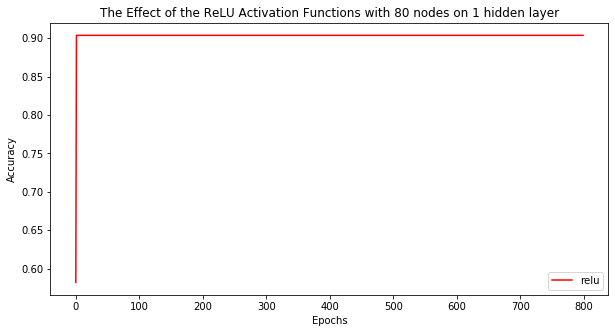

In [14]:
plt.figure(figsize=(10, 5))
costF,accrt  = n_network(len(X_train), epochs, [no_of_layer(33, 80, 'relu'), no_of_layer(80,1,'relu')], X_train, y_train )
plt.plot(range(epochs), accrt, label='relu', color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title('The Effect of the ReLU Activation Functions with 80 nodes on 1 hidden layer')
plt.show()

We explore the effect of the Sigmoid Activation Function.
The Sigmoid function is implemented with 80 nodes on 1 hidden layer

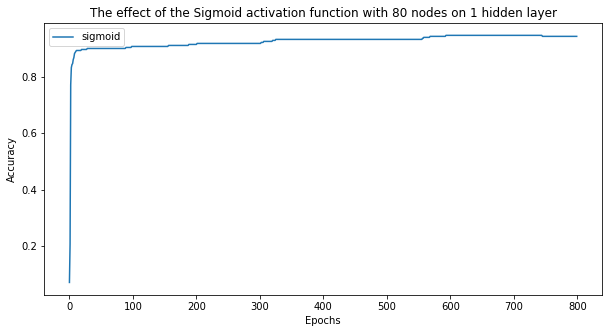

In [15]:
plt.figure(figsize=(10, 5))
costF,accrt  = n_network( len(X_train), epochs, [no_of_layer(33, 80, 'sigmoid') , no_of_layer(80,1,'sigmoid')] , X_train, y_train )
plt.plot(range(epochs), accrt, label='sigmoid')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title('The effect of the Sigmoid activation function with 80 nodes on 1 hidden layer')
plt.show()

### Observation

The model trained with ReLU converged quickly and thus takes much less time when compared to models trained on the Sigmoid function.
The model performance is slightly better when trained with the ReLU Activation Functions. 

# Exploring the effect of network size on generalization

We observe the  effect of network size on generalization by increasing number of number of hidden layers
and maintaining number of nodes (80)

## Exploring the effect of network size on generalizability (Sigmoid Activation Function)

Text(0.5, 1.0, 'Sigmoid 80 Nodes 1 hidden layer architecture')

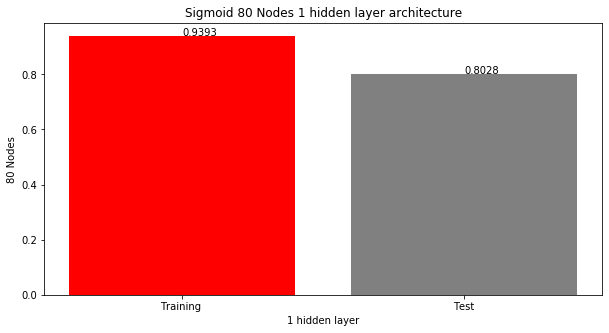

In [16]:
#80 Nodes 1 hidden layer
plt.figure(figsize=(10, 5))
results = accuracy([no_of_layer(33, 80, 'sigmoid') , no_of_layer(80,1,'sigmoid')], X_test, y_test)
gen = ["Training ","Test"]
plt.bar(gen, results, color = ['red', 'grey'])
for i in range(len(results)):
    plt.annotate(str(round(results[i],4)), xy=(gen[i],results[i]))
plt.xlabel("1 hidden layer")
plt.ylabel("80 Nodes")
plt.title('Sigmoid 80 Nodes 1 hidden layer architecture')



Text(0.5, 1.0, 'Sigmoid 80 Nodes 2 hidden layers architecture')

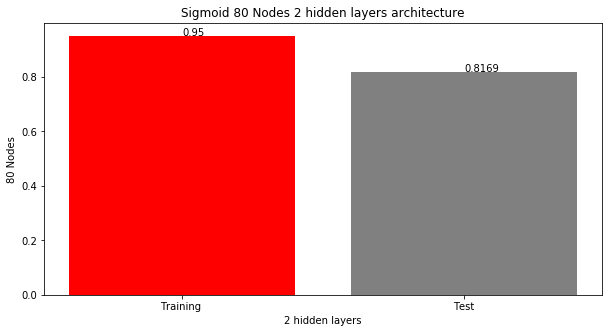

In [20]:
#80 Nodes 2 hidden layers
plt.figure(figsize=(10, 5))
results = accuracy([no_of_layer(33, 80, 'sigmoid'), no_of_layer(80,80,'sigmoid'), no_of_layer(80,1,'sigmoid')], X_test, y_test)
plt.bar(["Training ","Test"], results, color = ['red', 'grey'])
for i in range(len(results)):
    plt.annotate(str(round(results[i],4)), xy=(gen[i],results[i]))
plt.xlabel("2 hidden layers")
plt.ylabel("80 Nodes")
plt.title('Sigmoid 80 Nodes 2 hidden layers architecture')


For the Sigmoid Activation Function, we can see that increasing the number of layers resulted in
an increase in accuracy for both the training data and test data, this shows that our model
able to generalize properly. 

In [18]:
#Ends